In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import xarray as xr

In [4]:
from heat_plot_config import *

Iteration: 1, Target Distance: -2000.0000 km, Actual Distance: 2492.1677 km, Error: 492.1677 km
Iteration: 2, Target Distance: -2000.0000 km, Actual Distance: 1987.5814 km, Error: -12.4186 km
Iteration: 3, Target Distance: -2000.0000 km, Actual Distance: 2000.3384 km, Error: 0.3384 km
Iteration: 4, Target Distance: -2000.0000 km, Actual Distance: 1999.9908 km, Error: -0.0092 km
Iteration: 5, Target Distance: -2000.0000 km, Actual Distance: 2000.0003 km, Error: 0.0003 km
Iteration: 6, Target Distance: -2000.0000 km, Actual Distance: 2000.0000 km, Error: -0.0000 km
Iteration: 7, Target Distance: -2000.0000 km, Actual Distance: 2000.0000 km, Error: 0.0000 km
Rectangle Corners: [[-120.           39.5       ]
 [-102.5          22.5       ]
 [-116.59028114   10.55035943]
 [-134.09028114   29.23228783]]


In [5]:
import matplotlib.cm as cm
import matplotlib.colorbar as colorbar
import matplotlib.colors as mcolors

In [6]:
from datetime import datetime

In [7]:
from seaduck.eulerian_budget import _right90,_left90
def merge_ep(da):
    merged = np.zeros((50,180,180))
    merged[:,:90,:90] = _right90(np.array(da[:,8] ))
    merged[:,90:,:90] = _right90(np.array(da[:,7] ))
    merged[:,:90,90:] = _right90(np.array(da[:,11]))
    merged[:,90:,90:] = _right90(np.array(da[:,10]))
    return merged

def merge_coord(da):
    merged = np.zeros((180,180))
    merged[:90,:90] = _right90(np.array(da[8] ))
    merged[90:,:90] = _right90(np.array(da[7] ))
    merged[:90,90:] = _right90(np.array(da[11]))
    merged[90:,90:] = _right90(np.array(da[10]))
    return merged

def split_merge(merged):
    da = np.zeros((50,13,90,90))
    da[:,8] = _left90(merged[:,:90,:90])
    da[:,7] = _left90(merged[:,90:,:90])
    da[:,11]= _left90(merged[:,:90,90:])
    da[:,10]= _left90(merged[:,90:,90:])
    return da

In [8]:
from matplotlib.gridspec import GridSpec

In [9]:
import ecco_v4_py as e4p

In [10]:
import cartopy.crs as ccrs
projection = ccrs.Mercator(central_longitude=190.0, min_latitude=-80.0, max_latitude=84.0, latitude_true_scale=45.0)

In [11]:
xg = np.load('../james_plot/plotting_xg.npy')
yg = np.load('../james_plot/plotting_yg.npy')

In [12]:
path = '/sciserver/filedb04-01/ocean/wenrui_temp/particle_file/NEP/'
north = xr.open_zarr(path+'table_north_mhw.zarr')
south = xr.open_zarr(path+'table_south_mhw.zarr')

/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.38.0 or higher is recommended. You are running version 2.23.0
  warnings.warn(


In [13]:
import xmitgcm
bpath = f'/export/scratch/wjiang33/nep_backward/emu_trc_8827_7915_merged_mask_nep_new/'
dsa = xmitgcm.open_mdsdataset(bpath+'output/',
                        grid_dir = bpath+'temp/',
                        prefix = 'ptracer_mon_mean')

In [14]:
# from open4dense import give_me_orig_ecco
# ecco = give_me_orig_ecco()
ecco = xr.open_zarr('/sciserver/oceanography/ECCO_v4r4/ecco_v4r4')

In [15]:
recalc_jijie = False

In [16]:
# path = '/sciserver/filedb02-02/ocean/wenrui_temp/heat/'
# tjijie = xr.open_zarr(path+'tjijie.zarr')
if recalc_jijie:
    tjijie = np.array(ecco.THETA.groupby('time.month').mean(dim = 'time'))
    np.save('tjijie.npy',tjijie)

In [17]:
tjijie = np.load('tjijie.npy')

In [18]:
mxc = merge_coord(ecco.XC)
myc = merge_coord(ecco.YC)

In [19]:
sst = xr.open_dataset('monthly_1982_2024_sst.nc')

In [20]:
sst

<xarray.Dataset>
Dimensions:  (lon: 1440, lat: 720, month: 516)
Coordinates:
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * month    (month) float32 1.0 2.0 3.0 4.0 5.0 ... 513.0 514.0 515.0 516.0
Data variables:
    data     (month, lat, lon) float32 ...

In [21]:
ds = sst.sel(lon = slice(140,300),lat = slice(-10,None),month = slice(10*12,36*12-1))

In [22]:
sstm = ds.data.mean(dim = 'month').persist()

In [23]:
seas = np.array(ds.data).reshape(26,12,400,640).mean(axis = 0)

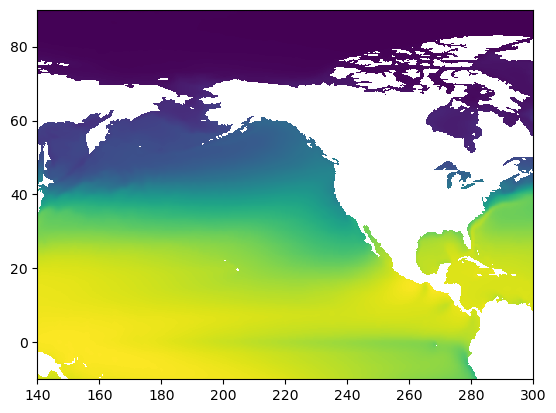

In [24]:
plt.pcolormesh(ds.lon,ds.lat,sstm)

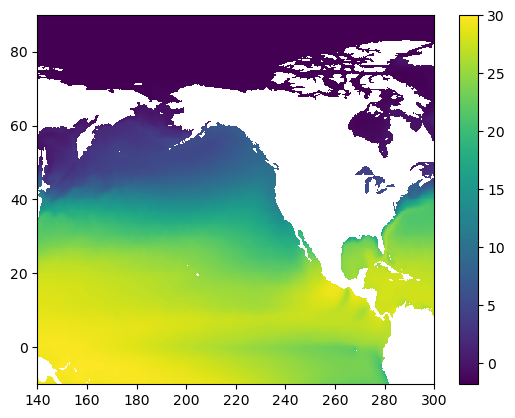

In [25]:
plt.pcolormesh(ds.lon,ds.lat,seas[0])
plt.colorbar()

In [26]:
def get_imonth(yr,month):
    return (yr-1992)*12+month

In [27]:
times = [
    (2013,8),
    (2014,1),
    (2014,11),
    (2015,3),
    (2015,10),
    (2016,2)
]

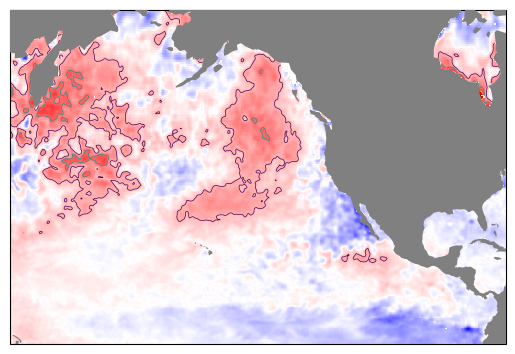

In [80]:
yr = 2013
month = 8
ax = plt.axes(projection = projection)
def plt_sst_anom(yr,month,ax,vmax = 7,cmap = 'seismic'):
    plt.pcolormesh(ds.lon,ds.lat,ds.data[get_imonth(yr,month)]-seas[month],cmap  =cmap,vmax = vmax,vmin = -vmax,transform = ccrs.PlateCarree(),linewidth=0,rasterized=True,)
    plt.contour(ds.lon,ds.lat,ds.data[get_imonth(yr,month)]-seas[month],levels = [1,2,3],transform = ccrs.PlateCarree(),linewidths = 0.5)
    ax.set_extent((-210,-75,-5,65),crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, zorder=10, facecolor='grey')
plt_sst_anom(yr,month,ax)

In [29]:
starts = [8096,8280,8461,8645]
start_inter = ['1403','1409','1503','1509']
start_long = ['2014-03','2014-09','2015-03','2015-09']
ends = [7915,8827]
end_inter = ['1309','1603']

stops = np.array(sorted(starts+ends))-ends[0]-1
stops[0] = 0

In [30]:
titles = ['2013-09','2014-03', '2014-09', '2015-03', '2015-09','2016-03']

In [31]:
months = [0,6,12,18,24,29]

In [32]:
trace = np.load('all_mhw.npy')

In [33]:
def get_particle_itime(yr,month):
    the_time = np.datetime64(f"{yr}-{month+1:02d}-01")
    dt = np.datetime64('2016-03-01') - the_time
    return np.minimum(int(dt/np.timedelta64(1, 'D')),911)

def get_tracer_index(yr,month):
    return (yr - 2013)*12+(month-8)

def get_tracer(yr,month):
    ind = (yr - 2013)*12+(month-8)
    if ind == 30:
        return trace
    else:
        first = e4p.llc_compact_to_tiles(np.array(dsa.TRAC01[ind]), less_output = True)
        return first

def plt_trc_pt(yr,month,ax,vmax = 150):
    ip = get_particle_itime(yr,month)
    trc = get_tracer(yr,month)
    trc = np.einsum('i,ijkl->ijkl',ecco.drF,trc).sum(axis = 0)
    trc_merge = merge_coord(trc)
    ax.plot(north.lon[ip,::101],north.lat[ip,::101],'go',transform = ccrs.PlateCarree(),markersize = 0.2)
    ax.plot(south.lon[ip,::101],south.lat[ip,::101],'bo',transform = ccrs.PlateCarree(),markersize = 0.2)
    ct = ax.contour(mxc%360,myc,trc_merge,transform = ccrs.PlateCarree(),levels = [1,10,50,100],linewidths = 0.3)
    # ax.clabel(ct,fmt = '%d m')
    for ii in [7,8,10,11]:
        p2 = ax.pcolormesh(xg[ii] ,yg[ii] ,trc[ii],vmax = vmax,vmin = 0,cmap = 'Oranges',
                           transform = ccrs.PlateCarree(),
                           linewidth=0,rasterized=True,
                           )
        p2.set_edgecolor('face')
    ax.set_extent((-210,-75,-5,65),crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, zorder=10, facecolor='grey')

In [34]:
get_particle_itime(2013,8)

911

In [35]:
def get_dayofyear(yr,month,day = 1):
    date = datetime(yr,month,day)
    day_of_year = date.timetuple().tm_yday
    return day_of_year-1

# def get_ecco_itime(yr,month):
#     the_time = np.datetime64(f"{yr}-{month+1:02d}-01")
#     dt = the_time - np.datetime64('1992-01-01')
#     return int(dt/np.timedelta64(1, 'D'))

def get_ecco_itime(yr,month):
    return (yr-1992)*12+month

def get_ecco_anom(yr,month):
    # 146.45 m actually
    theta = ecco.THETA[get_ecco_itime(yr,month)]
    theta_s = tjijie[month]
    return theta-theta_s

def get_ecco_surf(yr,month):
    return get_ecco_anom(yr,month).isel(k=0)

def get_ecco_150(yr,month):
    return -(get_ecco_anom(yr,month)*ecco.drF).isel(k=slice(14)).sum(dim = 'k')/float(ecco.Zl[15])

def get_ecco_depth(yr,month):
    return ((get_ecco_anom(yr,month)>1.5)*ecco.drF).isel(k=slice(14)).sum(dim = 'k')

def plt_ecco_temp(yr,month,ax, surface = False,vmax = 7,levels = np.arange(1,3)):
    if surface:
        data = get_ecco_surf(yr,month)
    else:
        data = get_ecco_150(yr,month)
    trc_merge = merge_coord(data)
    ct = ax.contour(mxc%360,myc,trc_merge,transform = ccrs.PlateCarree(),linewidths = 0.5,levels = levels)
    for ii in [7,8,10,11]:
        p2 = ax.pcolormesh(xg[ii] ,yg[ii] ,data[ii],vmax = vmax,vmin = -vmax,cmap = 'seismic',
                           transform = ccrs.PlateCarree(),
                           linewidth=0,rasterized=True,
                           )
        p2.set_edgecolor('face')
        ax.set_extent((-210,-75,-5,65),crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.LAND, zorder=10, facecolor='grey')

def plt_ecco_depth(yr,month,ax,vmax = 150):
    trc = get_ecco_depth(yr,month)
    trc_merge = merge_coord(trc)
    ct = ax.contour(mxc%360,myc,trc_merge,transform = ccrs.PlateCarree(),levels = [1,10,50,100],linewidths = 0.5)
    # ax.clabel(ct,fmt = '%d m')
    for ii in [7,8,10,11]:
        p2 = ax.pcolormesh(xg[ii] ,yg[ii] ,trc[ii],cmap = 'Oranges',
                           transform = ccrs.PlateCarree(),
                           linewidth=0,rasterized=True,
                           )
        p2.set_edgecolor('face')
    ax.set_extent((-210,-75,-5,65),crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, zorder=10, facecolor='grey')

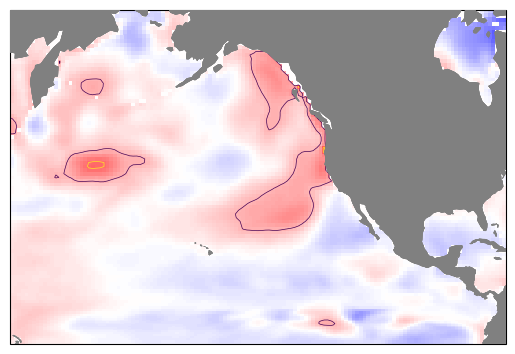

In [37]:
yr = 2013
month = 8
ax = plt.axes(projection = projection)
plt_ecco_temp(yr,month,ax,surface = True)

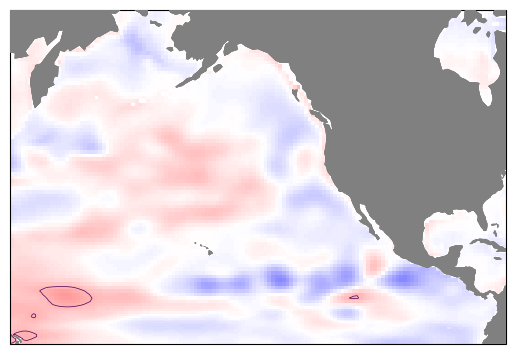

In [58]:
yr = 2013
month = 8
ax = plt.axes(projection = projection)
plt_ecco_temp(yr,month,ax,surface = False)

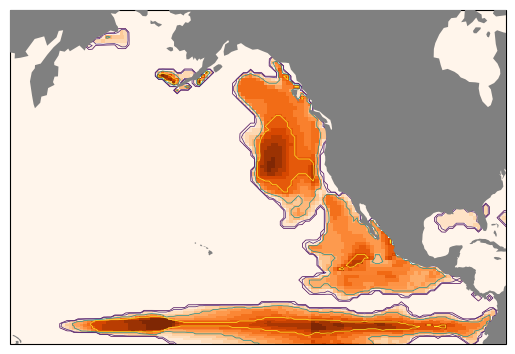

In [38]:
yr = 2015
month = 3
ax = plt.axes(projection = projection)
plt_ecco_depth(yr,month,ax)

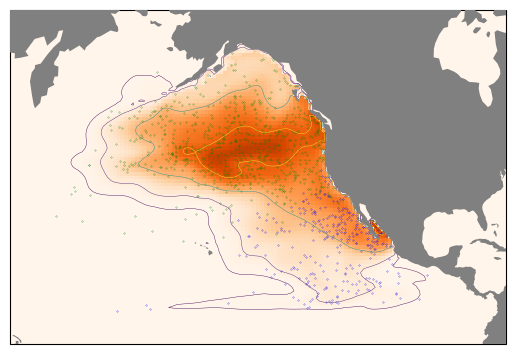

In [39]:
yr = 2015
month = 3
ax = plt.axes(projection = projection)
plt_trc_pt(yr,month,ax)

In [40]:
ecco.YC[7,:,49].values

array([45.06441, 45.06441, 45.06441, 45.06441, 45.06441, 45.06441,
       45.06441, 45.06441, 45.06441, 45.06441, 45.06441, 45.06441,
       45.06441, 45.06441, 45.06441, 45.06441, 45.06441, 45.06441,
       45.06441, 45.06441, 45.06441, 45.06441, 45.06441, 45.06441,
       45.06441, 45.06441, 45.06441, 45.06441, 45.06441, 45.06441,
       45.06441, 45.06441, 45.06441, 45.06441, 45.06441, 45.06441,
       45.06441, 45.06441, 45.06441, 45.06441, 45.06441, 45.06441,
       45.06441, 45.06441, 45.06441, 45.06441, 45.06441, 45.06441,
       45.06441, 45.06441, 45.06441, 45.06441, 45.06441, 45.06441,
       45.06441, 45.06441, 45.06441, 45.06441, 45.06441, 45.06441,
       45.06441, 45.06441, 45.06441, 45.06441, 45.06441, 45.06441,
       45.06441, 45.06441, 45.06441, 45.06441, 45.06441, 45.06441,
       45.06441, 45.06441, 45.06441, 45.06441, 45.06441, 45.06441,
       45.06441, 45.06441, 45.06441, 45.06441, 45.06441, 45.06441,
       45.06441, 45.06441, 45.06441, 45.06441, 45.06441, 45.06

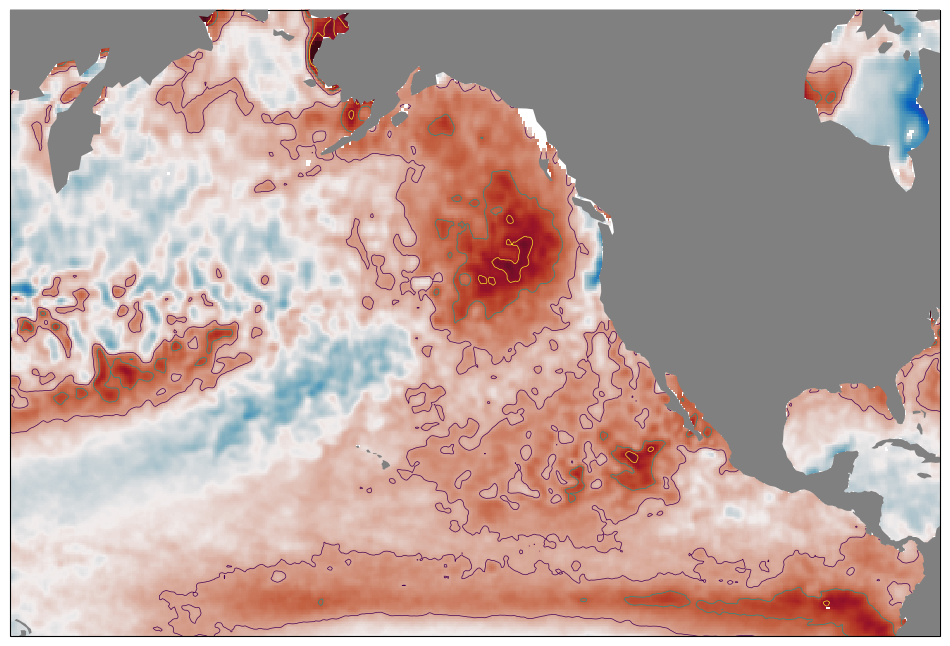

In [83]:
fig = plt.figure(figsize = (12,9))
ax = plt.axes(projection = projection)
plt_sst_anom(2015,6,ax,vmax = 4,cmap = cmocean.cm.balance)

In [41]:
# # yr = 2015
# ix = 49
# data = get_tracer(yr,month)
# for fc in [7,10]:
#     plt.pcolormesh(xg[fc,:,ix]%360,zl,data[:,fc,:,ix],vmax = 1,cmap = 'Oranges')
#     plt.ylim(-300,0)
#     plt.xlim(150,250)

In [74]:
ix = 49
xg710 = np.zeros(181)
xg710[:91] = xg[7,:,ix]%360
xg710[90:] = xg[10,:,ix]%360
xc710 = np.zeros(180)
xc710[:90] = np.array(ecco.XC[7,:,ix])%360
xc710[90:] = np.array(ecco.XC[10,:,ix])%360

zl = np.array(list(ecco.Zl) + [-7000])
mask = np.zeros((50,180)).astype(bool)
def get_7_10_vert_section(data):
    out = np.zeros((50,180))
    out[:,:90] = data[:,7,:,ix]
    out[:,90:] = data[:,10,:,ix]
    out[mask] = np.nan
    return out

mask = get_7_10_vert_section(ecco.THETA[0]==0).astype(bool)

# def plt_particle_vert(yr,month,ax):
#     ip = get_particle_itime(yr,month)
#     where = np.where(np.logical_and(north.lat[ip]>44.5,north.lat[ip]<45.5))
#     ax.plot(np.array(north.lon[ip])[where]%360,np.array(north.dep[ip])[where],'go',markersize = 0.5)
#     ax.set_ylim(-300,0)
#     ax.set_xlim(150,250)

def plt_vert(yr,month,ax):
    ax.set_facecolor('grey')
    data = get_tracer(yr,month)
    ax.pcolormesh(xg710,zl,get_7_10_vert_section(data),vmax = 1.,cmap = 'Oranges',linewidth = 0,rasterized = True)
    data = get_ecco_anom(yr,month)
    ct = ax.contour(xc710,ecco.Z,get_7_10_vert_section(data),levels = [1.5],colors = ['k'])
    # ax.clabel(ct)
    ip = get_particle_itime(yr,month)
    where = np.where(np.logical_and(north.lat[ip]>44.9,north.lat[ip]<45.1))[0][::]
    # print(where)
    # print(len(np.array(north.lon[ip])[where]%360))
    ax.plot(np.array(north.lon[ip])[where]%360,np.array(north.dep[ip])[where],'go',markersize = 0.2,rasterized = True)
    ax.set_xticks([180,240],[r'180$^\circ$',r'120$^\circ\mathrm{W}$'])
    ax.set_ylim(-250,0)
    ax.set_xlim(150,250)

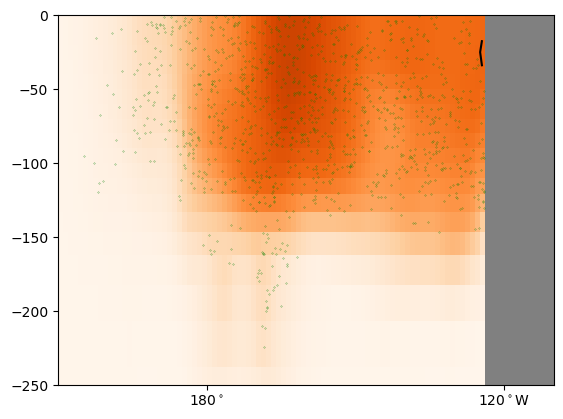

In [75]:
month = 8
yr  =2013
ax = plt.axes()
plt_vert(yr,month,ax)

In [44]:
# vmax = 150
# fig,axss = plt.subplots(2,3,subplot_kw = dict(projection = projection),figsize = (16,9))
# axss = axss.ravel()
# for it in range(6):
#     ax = axss[it]
#     ax.plot(north.lon[stops[::-1][it],::51],north.lat[stops[::-1][it],::51],'go',transform = ccrs.PlateCarree(),markersize = 1)
#     ax.plot(south.lon[stops[::-1][it],::51],south.lat[stops[::-1][it],::51],'bo',transform = ccrs.PlateCarree(),markersize = 1)
#     trc = e4p.llc_compact_to_tiles(np.array(dsa.TRAC01[months[it]]), less_output = True)
#     for ii in [7,8,10,11]:
#         p2 = ax.pcolormesh(xg[ii] ,yg[ii] ,np.einsum('i,ijk->ijk',ecco.drF,trc[:,ii]).sum(axis = 0) ,vmax = vmax,vmin = 1,cmap = 'Oranges',
#                            transform = ccrs.PlateCarree(),
#                            linewidth=0,rasterized=True,
#                            )
#         p2.set_edgecolor('face')
#     ax.add_feature(cfeature.LAND, zorder=10, facecolor='grey')
#     ax.set_extent((-210,-75,-5,65),crs=ccrs.PlateCarree())
#     ax.set_title(titles[it])
# plt.tight_layout()

In [39]:
def add_gridline(ax):
    gl = ax.gridlines(draw_labels = True,linestyle="--", linewidth=0.5)
    gl.top_labels = False
    gl.right_labels= False
    gl.xlabel_style = {'size':6}
    gl.ylabel_style = {'size':6}

In [37]:
plt_times = times[1:-1]

In [38]:
mm = 1/25.4

In [41]:
def plot_colorbar_in_cax(vmin, vmax, cmap, cax, **kwargs):
    """
    Plot a colorbar in the given cax using specified vmin, vmax, and colormap.

    Parameters:
        vmin (float): Minimum value of the color scale.
        vmax (float): Maximum value of the color scale.
        cmap (str or Colormap): The colormap to use.
        cax (matplotlib.axes.Axes): The axes to draw the colorbar in.
        **kwargs: Additional keyword arguments passed to plt.colorbar().
    """
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    # sm.set_array([])  # Required by plt.colorbar
    return plt.colorbar(sm, cax=cax, **kwargs)

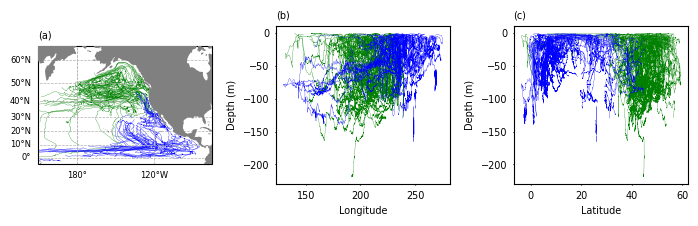

In [58]:
np.random.seed(0)
north_slc = np.random.choice(np.arange(len(north.space)),140)
south_slc = np.random.choice(np.arange(len(south.space)),60)
def plt_pt_traj(ax):
    ax.plot(north.lon[:,north_slc],north.lat[:,north_slc],'g',transform = ccrs.PlateCarree(),lw = 0.2)
    ax.plot(south.lon[:,south_slc],south.lat[:,south_slc],'b',transform = ccrs.PlateCarree(),lw = 0.2)
    ax.set_extent((-210,-75,-5,65),crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, zorder=10, facecolor='grey')
fig = plt.figure(figsize = (180*mm,60*mm))
ax = fig.add_subplot(1,3,1,projection = projection)
add_gridline(ax)
plt_pt_traj(ax)
ax.set_title("(a)",loc = 'left',fontsize = 7)

ax = fig.add_subplot(1,3,2)
ax.plot(north.lon[:,north_slc]%360,north.dep[:,north_slc],'g',lw = 0.2)
ax.plot(south.lon[:,south_slc]%360,south.dep[:,south_slc],'b',lw = 0.2)
ax.set_xlabel('Longitude',fontsize = 7)
ax.set_ylabel('Depth (m)',fontsize = 7)
ax.set_title("(b)",loc = 'left',fontsize = 7)
ax.tick_params('both',length = 1,labelsize = 7)

ax = fig.add_subplot(1,3,3)
ax.plot(north.lat[:,north_slc],north.dep[:,north_slc],'g',lw = 0.2)
ax.plot(south.lat[:,south_slc],south.dep[:,south_slc],'b',lw = 0.2)
ax.set_xlabel('Latitude',fontsize = 7)
ax.set_ylabel('Depth (m)',fontsize = 7)
ax.set_title("(c)",loc = 'left',fontsize = 7)
ax.tick_params('both',length = 1,labelsize = 7)

plt.tight_layout()

plt.savefig('sup_pt_trj.pdf',dpi = 300)

0 1 2 3 

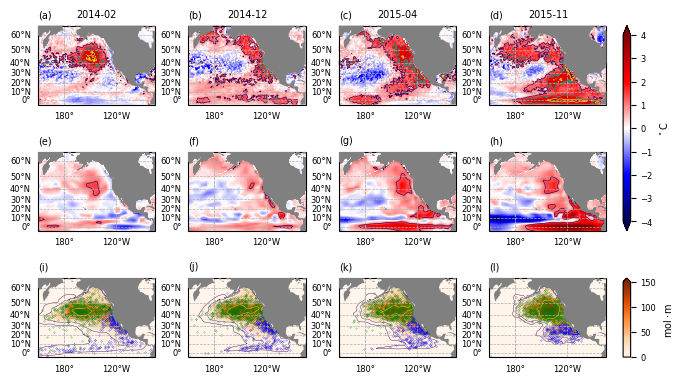

In [55]:
fig = plt.figure(figsize = (180*mm,100*mm))
gs = GridSpec(3,len(plt_times)+1,width_ratios = [1 for i in plt_times]+[0.05],wspace = 0.)
for i,(yr,month) in enumerate(plt_times):
    print(i, end  = ' ')
    ax = fig.add_subplot(gs[0,i],projection = projection)
    plt_sst_anom(yr,month,ax,vmax = 4)
    
    ax1 = fig.add_subplot(gs[1,i],projection = projection)
    plt_ecco_temp(yr,month,ax1,vmax = 4,levels = [1.25])
    # plt_ecco_depth(yr,month,ax1)
    ax2 = fig.add_subplot(gs[2,i],projection = projection)
    plt_trc_pt(yr,month,ax2)
    for j,_ in enumerate([ax,ax1,ax2]):
        add_gridline(_)
        _.set_title(f"({chr(97+j*len(plt_times)+i)})",loc = 'left',fontsize = 7)
    ax.set_title(f'{yr}-{month+1:02d}',fontsize = 7)
cax1 = fig.add_subplot(gs[:2,-1])
cb1 = plot_colorbar_in_cax(-4, 4, 'seismic', cax1,extend = 'both')
cax2 = fig.add_subplot(gs[-1,-1])
cb2 = plot_colorbar_in_cax(0, 150, 'Oranges', cax2,extend = 'max')
for cb in [cb1,cb2]:
    cb.ax.tick_params(labelsize=6)
cb1.set_label(r'$ ^\circ \mathrm{C}$', fontsize=7)
cb2.set_label(r'$\mathrm{mol\cdot m}$', fontsize=7)
plt.tight_layout()
plt.savefig('fig1.pdf',format = 'pdf',dpi = 300)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 

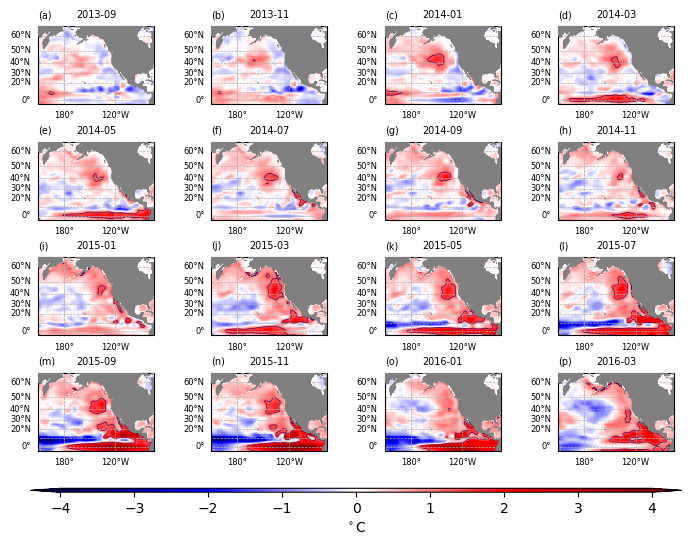

In [50]:
fig = plt.figure(figsize = (180*mm,140*mm))
small = 0.05
gs = GridSpec(5,4,height_ratios = [1 for i in range(4)] + [small])
for i in range(16):
    print(i,end = ' ')
    ax = fig.add_subplot(gs[i//4,i%4],projection = projection)
    month = (8+2*i)%12
    yr = (8+2*i)//12+2013
    plt_ecco_temp(yr,month,ax,vmax = 4,levels = [1.25])
    add_gridline(ax)
    ax.set_title(f"({chr(97+i)})",loc = 'left',fontsize = 7)
    ax.set_title(f'{yr}-{month+1:02d}',fontsize = 7)

plot_colorbar_in_cax(-4, 4, 'seismic', fig.add_subplot(gs[-1,:]),orientation = 'horizontal',extend = 'both',label = r'$ ^\circ \mathrm{C}$')
plt.tight_layout()
plt.savefig('sup_150_temp.pdf',dpi = 300)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 

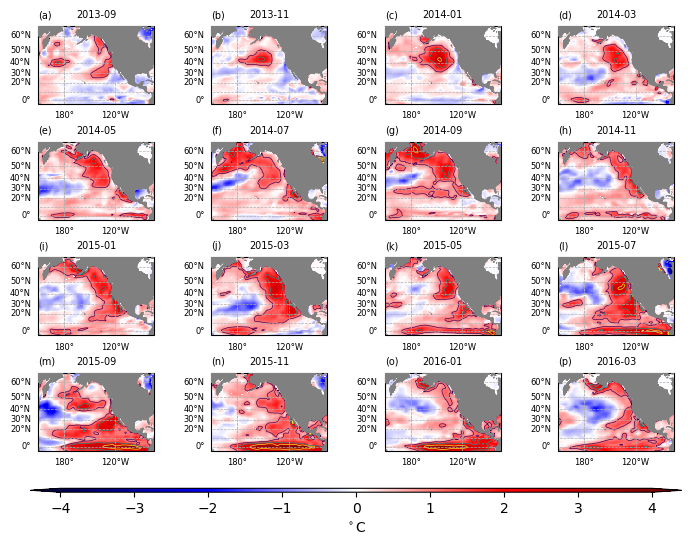

In [42]:
fig = plt.figure(figsize = (180*mm,140*mm))
small = 0.05
gs = GridSpec(5,4,height_ratios = [1 for i in range(4)] + [small])
for i in range(16):
    print(i,end = ' ')
    ax = fig.add_subplot(gs[i//4,i%4],projection = projection)
    month = (8+2*i)%12
    yr = (8+2*i)//12+2013
    plt_ecco_temp(yr,month,ax,vmax = 4,levels = [1,2,3],surface = True)
    add_gridline(ax)
    ax.set_title(f"({chr(97+i)})",loc = 'left',fontsize = 7)
    ax.set_title(f'{yr}-{month+1:02d}',fontsize = 7)

plot_colorbar_in_cax(-4, 4, 'seismic', fig.add_subplot(gs[-1,:]),orientation = 'horizontal',extend = 'both',label = r'$ ^\circ \mathrm{C}$')
plt.tight_layout()
plt.savefig('sup_ecco_sst.pdf',dpi = 300)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 

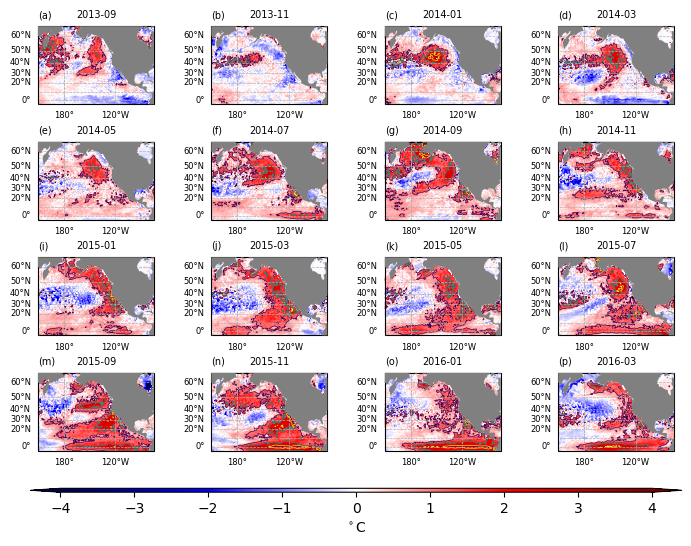

In [51]:
fig = plt.figure(figsize = (180*mm,140*mm))
small = 0.05
gs = GridSpec(5,4,height_ratios = [1 for i in range(4)] + [small])
for i in range(16):
    print(i,end = ' ')
    ax = fig.add_subplot(gs[i//4,i%4],projection = projection)
    month = (8+2*i)%12
    yr = (8+2*i)//12+2013
    plt_sst_anom(yr,month,ax,vmax = 4)
    add_gridline(ax)
    ax.set_title(f"({chr(97+i)})",loc = 'left',fontsize = 7)
    ax.set_title(f'{yr}-{month+1:02d}',fontsize = 7)

plot_colorbar_in_cax(-4, 4, 'seismic', fig.add_subplot(gs[-1,:]),orientation = 'horizontal',extend = 'both',label = r'$ ^\circ \mathrm{C}$')
plt.tight_layout()
plt.savefig('sup_sst.pdf',dpi = 300)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 

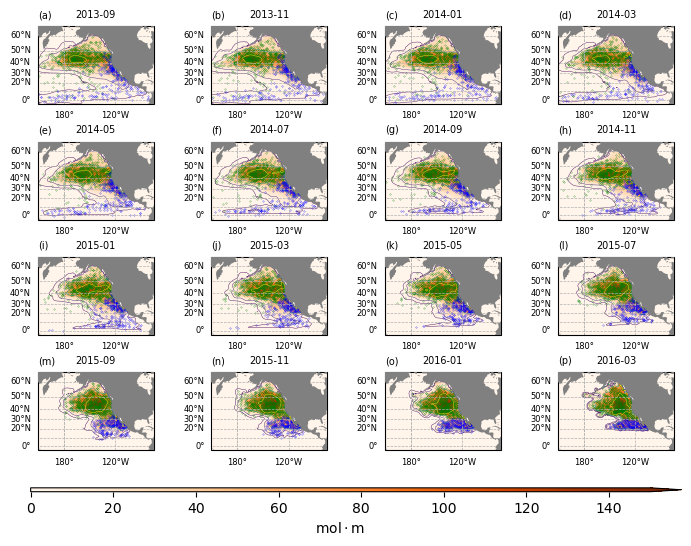

In [57]:
fig = plt.figure(figsize = (180*mm,140*mm))
small = 0.05
gs = GridSpec(5,4,height_ratios = [1 for i in range(4)] + [small])
for i in range(16):
    print(i,end = ' ')
    ax = fig.add_subplot(gs[i//4,i%4],projection = projection)
    month = (8+2*i)%12
    yr = (8+2*i)//12+2013
    plt_trc_pt(yr,month,ax)
    add_gridline(ax)
    ax.set_title(f"({chr(97+i)})",loc = 'left',fontsize = 7)
    ax.set_title(f'{yr}-{month+1:02d}',fontsize = 7)

plot_colorbar_in_cax(0, 150, 'Oranges', fig.add_subplot(gs[-1,:]),orientation = 'horizontal',extend = 'max',label = r'$\mathrm{mol\cdot m}$')
plt.tight_layout()
plt.savefig('sup_trc.pdf',dpi = 300)

In [53]:
j

2

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 

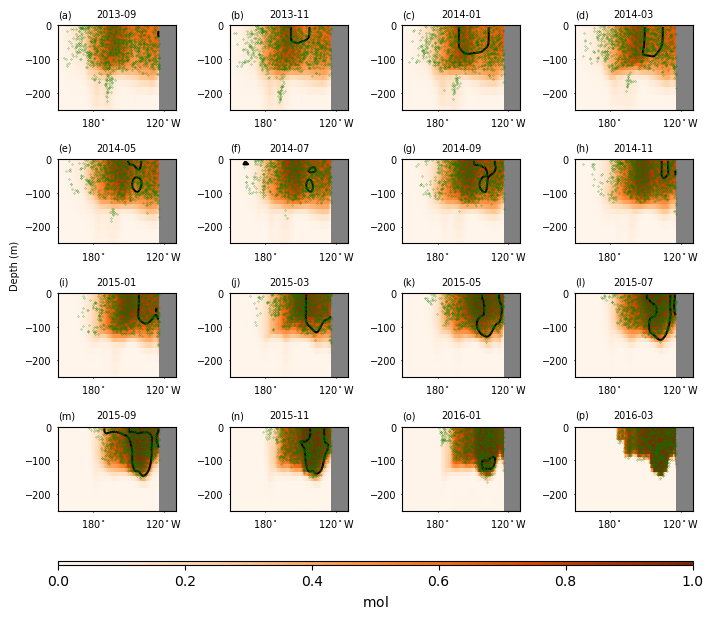

In [76]:
fig = plt.figure(figsize = (180*mm,160*mm))
small = 0.05
gs = GridSpec(5,4,height_ratios = [1 for i in range(4)] + [small])
for i in range(16):
    print(i,end = ' ')
    ax = fig.add_subplot(gs[i//4,i%4])
    month = (8+2*i)%12
    yr = (8+2*i)//12+2013
    plt_vert(yr,month,ax)
    # add_gridline(ax)
    ax.set_title(f"({chr(97+i)})",loc = 'left',fontsize = 7)
    ax.set_title(f'{yr}-{month+1:02d}',fontsize = 7)
    ax.tick_params('both',length = 1,labelsize = 7)

plot_colorbar_in_cax(0, 1, 'Oranges', fig.add_subplot(gs[-1,:]),orientation = 'horizontal',extend = 'neither',label = r'$\mathrm{mol}$')
# fig.text(0.5, 0.12, 'Longitude', ha='center',fontsize = 7)
fig.text(0.0, 0.57, 'Depth (m)', va='center', rotation='vertical',fontsize = 7)

plt.tight_layout()
plt.savefig('sup_vert.pdf',dpi = 300)